# We will use a neural network to recognize the hand-written digits 0-9.

## Import all the packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

from utils import *

## Problem Statement
We will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

## Import Dataset

- The data set contain 5000 traning examples of handwritten digits .
- Each example is a 20 x 20 pixel grayscale image of the digit .
- The second part of the training set is a 5000 x 1 dimensional vector y that contains labels for the training set .
- y = 0 if the image is of the digit 0, y = 4 if the image is of the digit 4 and so on.

In [2]:
X , y = load_data()

In [3]:
print("Shape of X is" , X.shape)
print("Shape of y is" , y.shape)

Shape of X is (5000, 400)
Shape of y is (5000, 1)


## Visualizing the dataset

In [4]:
import matplotlib.pyplot as plt

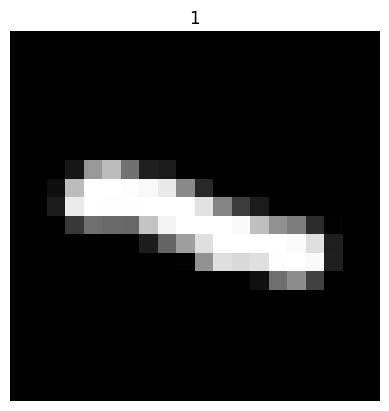

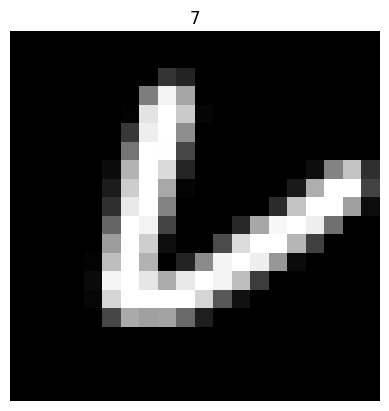

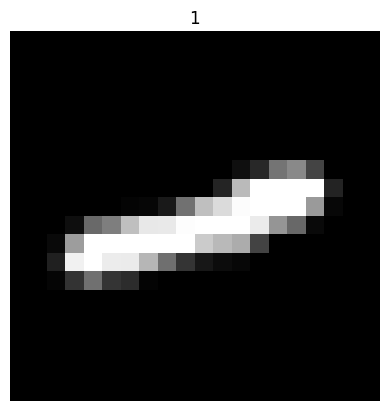

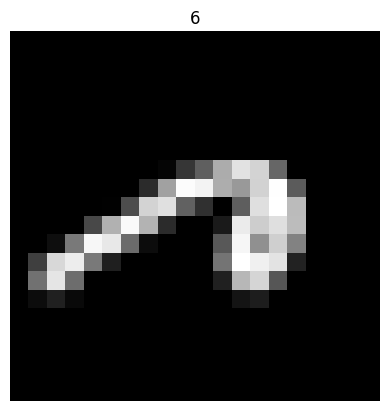

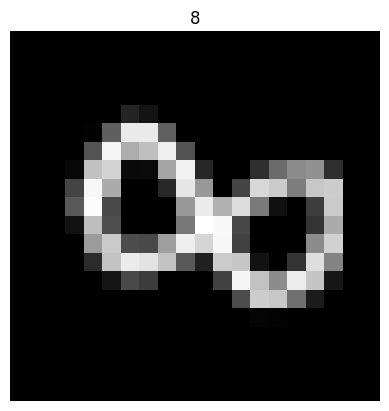

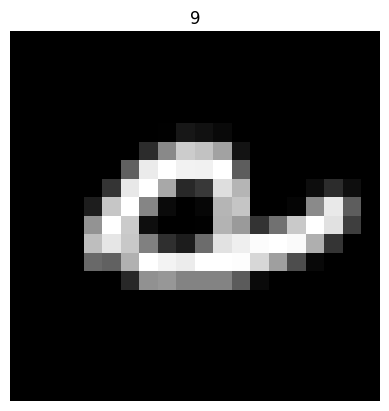

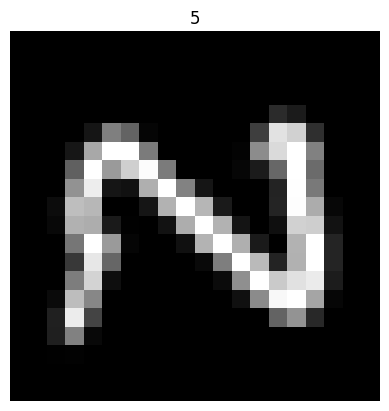

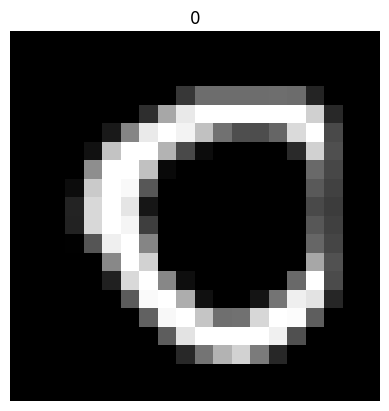

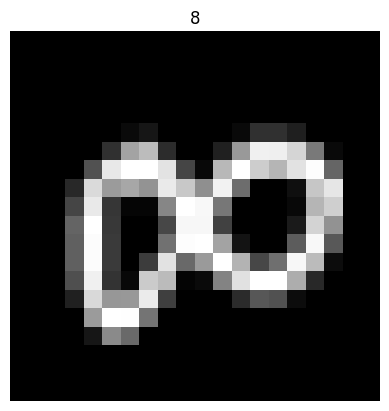

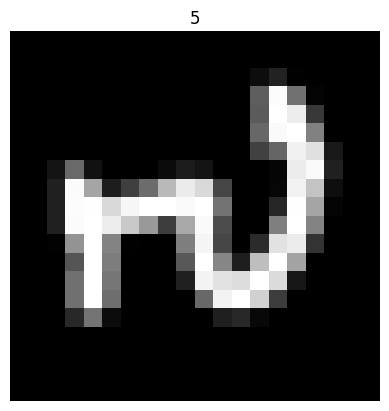

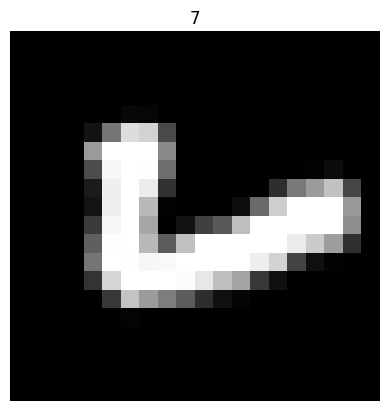

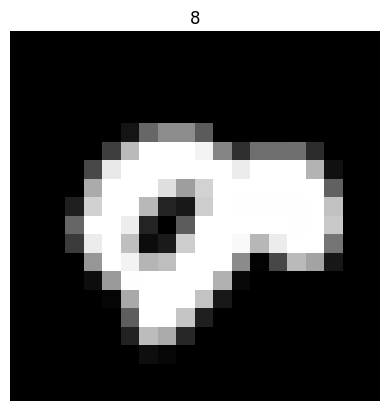

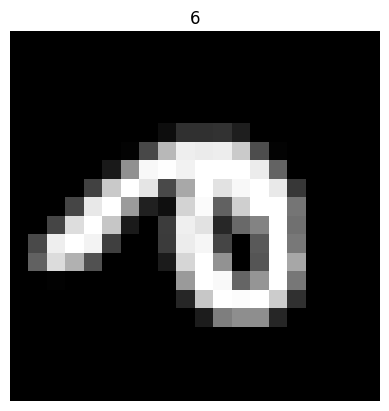

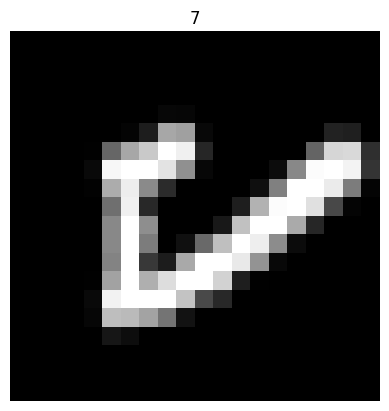

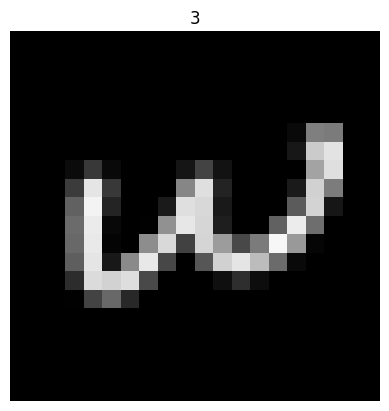

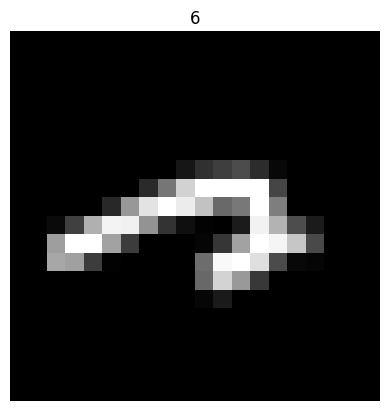

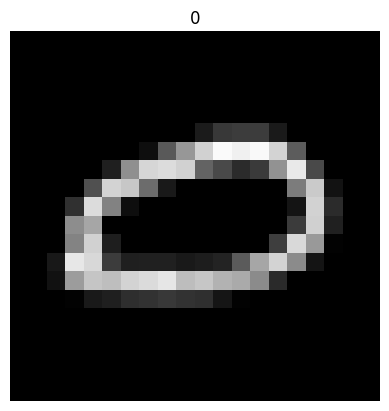

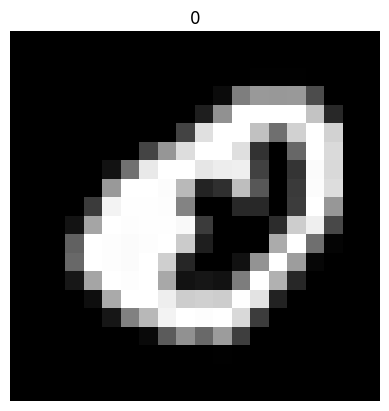

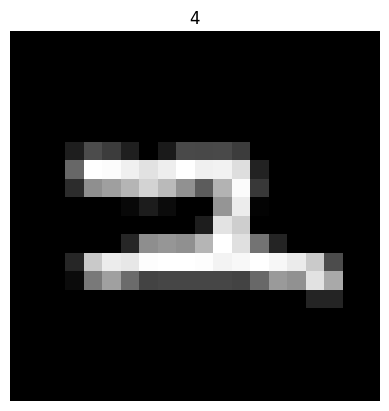

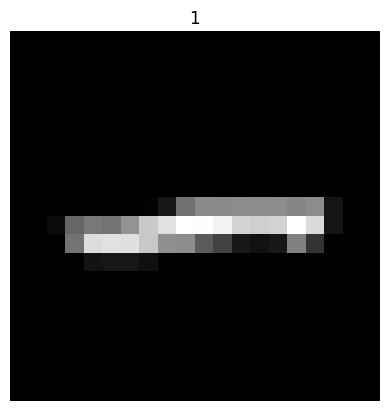

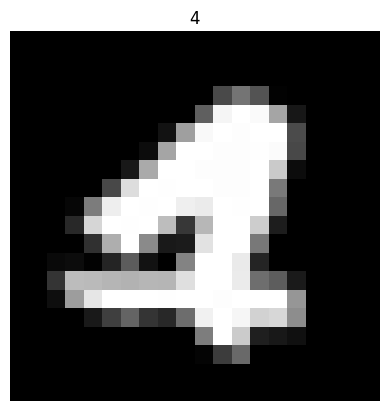

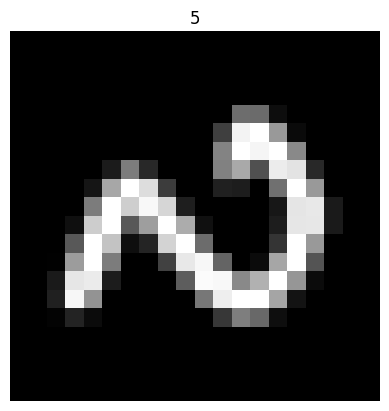

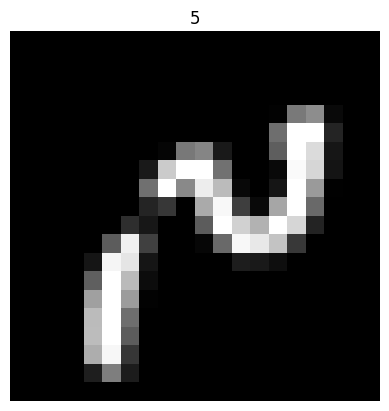

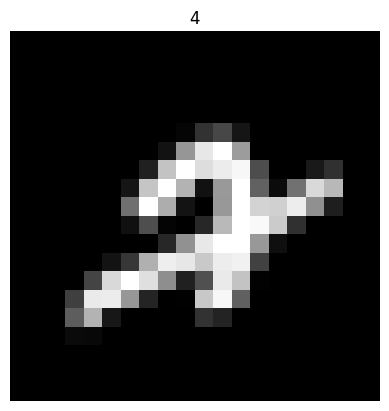

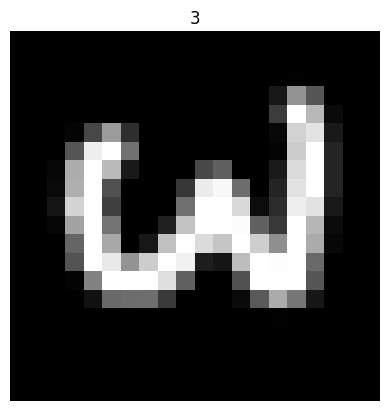

In [5]:
m , n = X.shape
for i in range(25):
   random_index = np.random.randint(m)
   pixel_array = X[random_index].reshape(20 , 20)
   plt.imshow(pixel_array , cmap = "gray" , vmin = 0 , vmax = 1)
   plt.title (y[random_index , 0])
   plt.axis("off")
   plt.show()




## Model Implementation

In [6]:
model = Sequential(
    [               
       
        tf.keras.Input(shape = (400 , )),
        Dense(units = 25 , activation = "relu" , name = "layer_1"),
        Dense(units = 15 , activation = "relu" , name = "layer_2"),
        Dense(units = 10 , activation = "linear" , name = "layer_3")
        
       
    ], name = "my_model" 
)

In [7]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

## Parameters : shapes of W, and b
- layer1: The shape of W1 is (400, 25) and the shape of b1 is (25,)
- layer2: The shape of W2 is (25, 15) and the shape of b2 is:(15,)
- layer3: The shape of W3 is (15, 10) and the shape of b3 is: (10,)
  

In [8]:
W1 , b1 = model.get_layer("layer_1").get_weights()
W2 , b2 = model.get_layer("layer_2").get_weights()
W3 , b3 = model.get_layer("layer_3").get_weights()

In [9]:
print(f"W1 shape :- {W1.shape}  b1 shape {b1.shape}")
print(f"W2 shape :- {W2.shape}  b2 shape {b2.shape}")
print(f"W3 shape :- {W3.shape}  b3 shape {b3.shape}")

W1 shape :- (400, 25)  b1 shape (25,)
W2 shape :- (25, 15)  b2 shape (15,)
W3 shape :- (15, 10)  b3 shape (10,)


## Defining Loss and running **ADAM Algorithm** for the model . 

In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(X , y , epochs = 40 )

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8900
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6547
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4068
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3423
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3061
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2640
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2246
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2189
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2186
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2056
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1895
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1661
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1435
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1508
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

## Prediction

In [11]:
xtest = convert_to_grayscale()
print(xtest)
print(len(xtest))
print(xtest.shape)

[[190 191 191 191 192 192 193 193 194 194 195 195 196 195 191 186 183 183
  184 186]
 [190 191 191 191 192 192 193 192 193 193 195 195 196 194 191 186 183 183
  184 185]
 [190 191 191 191 192 192 192 194 197 196 194 194 195 193 190 186 183 182
  184 185]
 [189 192 190 190 192 192 196 178 154 158 195 198 199 194 189 186 183 182
  184 185]
 [188 191 190 190 193 195 130  49  48  49  77  80 149 194 193 185 182 181
  184 185]
 [188 189 190 191 196 116  46 132 182 174 115  72  38  80 173 189 182 181
  183 184]
 [187 188 189 195 135  47 158 198 194 195 200 196 164  62  56 173 185 181
  182 183]
 [187 187 190 179  52 130 197 191 192 192 193 194 199 188  72  79 185 181
  182 182]
 [187 187 193 115  69 188 190 191 191 192 192 193 193 195 177  45 128 185
  181 182]
 [187 186 188  65 134 194 189 190 191 192 193 192 193 192 196 113  70 185
  181 181]
 [187 187 176  58 167 191 189 189 191 192 192 193 192 192 193 143  60 182
  181 182]
 [187 188 178  56 159 190 189 190 191 191 191 192 192 191 194 133

In [12]:
logits = model.predict(xtest.reshape(1,400))
print(f"The number may be : {np.argmax(logits)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
The number may be : 3


In [13]:
prediction_probability = tf.nn.softmax(logits)
print(f"Total of predictions: {np.sum(prediction_probability):0.3f}")
print(prediction_probability)
print("Maximum probability value : " , np.max(prediction_probability),"\nIndex of maximum probability : ", np.argmax(prediction_probability))


Total of predictions: 1.000
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
Maximum probability value :  1.0 
Index of maximum probability :  3


In [14]:
yhat = np.argmax(prediction_probability)
print(f"The number may be {np.argmax(prediction_probability)}")

The number may be 3
